In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
data = pd.read_csv("../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv")

In [3]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
data.shape

(9879, 40)

In [6]:
data.drop('gameId', axis =1, inplace=True)

In [7]:
data = data.sample(frac=1,ignore_index=True)

In [8]:
data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,27,5,1,6,3,5,2,1,1,...,0,15246,6.8,17543,231,42,-1597,-1617,23.1,1524.6
1,1,18,5,0,6,4,7,0,0,0,...,0,16154,7.2,18760,241,55,-267,52,24.1,1615.4
2,0,55,2,0,6,5,10,0,0,0,...,0,16045,7.0,17624,211,67,-503,194,21.1,1604.5
3,1,15,1,0,4,5,4,0,0,0,...,0,15947,7.2,18835,231,55,786,837,23.1,1594.7
4,0,19,3,1,7,9,10,0,0,0,...,0,17495,7.0,17816,213,43,462,1186,21.3,1749.5


In [9]:
y=data['blueWins']

In [10]:
data.drop('blueWins', axis=1, inplace=True)

<AxesSubplot:>

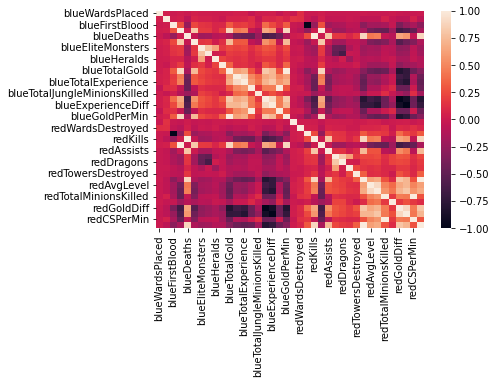

In [11]:
sns.heatmap(data.corr())

In [12]:
frac = 0.75
num_examples = data.shape[0]
num_train_examples = int(frac * num_examples)
num_test_examples = num_examples - num_train_examples
print(num_examples)
print(num_train_examples)
print(num_test_examples)

9879
7409
2470


In [13]:
x_train= data.iloc[0:num_train_examples,:]
y_train=y.iloc[0:num_train_examples]

x_test= data.iloc[num_train_examples:,:]
y_test=y.iloc[num_train_examples:num_examples]

In [14]:
x_train.shape
y_train.shape

(7409,)

In [15]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

In [16]:
x = tf.keras.Input(shape=(38,))
y = tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)
y = tf.keras.layers.Dense(16, activation=tf.nn.relu)(y)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(y)

model = tf.keras.Model(inputs=x, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 38)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 930
Trainable params: 930
Non-trainable params: 0
_________________________________________________________________



User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'


In [17]:
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [18]:
EPOCHS = 500
BATCH_SIZE = 32

In [19]:
model.fit(
    x=x_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_split=0.2,
    shuffle=True
)

2022-02-03 13:22:25.880004: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
186/186 [==============================] - 1s 3ms/step - loss: 40.1570 - accuracy: 0.6486 - val_loss: 21.5950 - val_accuracy: 0.6471
Epoch 2/500
186/186 [==============================] - 0s 2ms/step - loss: 13.8131 - accuracy: 0.6320 - val_loss: 22.8871 - val_accuracy: 0.5142
Epoch 3/500
186/186 [==============================] - 0s 2ms/step - loss: 9.5582 - accuracy: 0.6285 - val_loss: 36.7918 - val_accuracy: 0.5661
Epoch 4/500
186/186 [==============================] - 0s 2ms/step - loss: 13.2236 - accuracy: 0.6469 - val_loss: 2.4398 - val_accuracy: 0.7233
Epoch 5/500
186/186 [==============================] - 0s 2ms/step - loss: 10.6754 - accuracy: 0.6254 - val_loss: 4.3077 - val_accuracy: 0.7213
Epoch 6/500
186/186 [==============================] - 0s 2ms/step - loss: 8.0459 - accuracy: 0.6420 - val_loss: 1.9644 - val_accuracy: 0.7240
Epoch 7/500
186/186 [==============================] - 0s 2ms/step - loss: 9.4462 - accuracy: 0.6307 - val_loss: 23.5439 - val_accuracy

In [20]:
loss, accuracy = model.evaluate(x_test, y_test)

78/78 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.7215
